# US Baby names analysis 

Here the data is split into multiple files. So I will make a loop and go through each of them.

In [1]:
import pandas as pd
import numpy as np

In [8]:
pd.read_csv("US_BABY/yob1880.txt", header= None)

,0,1,2
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


Now, as the data is split into multiple files, I would open and do my stuff.

In [2]:
dfs = []
for year in range(1880, 2011):
    df = pd.read_csv(f'US_BABY/yob{year}.txt', header= None, names= ['name', 'gender', 'total'])
    df['year'] = year
    dfs.append(df)
    

In [3]:
data = pd.concat(dfs, ignore_index= True)

In [4]:
data

,name,gender,total,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [5]:
del df

# 

## Births by Gender and Year 

In [30]:
year_wise = data.pivot_table('total', index= 'year', columns= 'gender', aggfunc= 'sum')
year_wise

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


<AxesSubplot:xlabel='year'>

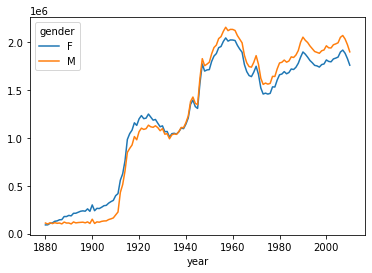

In [31]:
year_wise.plot()

## Which names are New each year? 

In [33]:
# Taking an example of 1880 and 1881
_1880 = data[data.year == 1880]
_1881 = data[data.year == 1881]

In [39]:
_1880.name.unique()

array(['Mary', 'Anna', 'Emma', ..., 'Wright', 'York', 'Zachariah'],
      dtype=object)

In [49]:
np.setdiff1d(_1881.name.unique(US_BABY/ _1880.name.unique())

array(['Acie', 'Adell', 'Adrien', 'Aggie', 'Aida', 'Aletha', 'Alfonso',
       'Alfreda', 'Alicia', 'Allene', 'Almedia', 'Alto', 'Alvis',
       'Ambers', 'Ammon', 'Andrea', 'Angelo', 'Antone', 'Arabella',
       'Arden', 'Arminda', 'Arra', 'Ashton', 'Ason', 'Atticus', 'Audie',
       'Audrey', 'Aura', 'Bee', 'Belton', 'Belva', 'Berdie', 'Biddie',
       'Bina', 'Blair', 'Boss', 'Brown', 'Bula', 'Burke', 'Burrell',
       'Byrdie', 'Cammie', 'Campbell', 'Cap', 'Carmen', 'Carry', 'Carter',
       'Cas', 'Casimiro', 'Cass', 'Celesta', 'Celeste', 'Chalmer',
       'Champ', 'Chloie', 'Christie', 'Claribel', 'Coley', 'Collie',
       'Collins', 'Conway', 'Coral', 'Corean', 'Corinna', 'Courtney',
       'Craig', 'Crete', 'Curley', 'Dale', 'Dalton', 'Darrell', 'Darwin',
       'Deforest', 'Dennie', 'Denton', 'Dicy', 'Dixon', 'Dolph',
       'Dominick', 'Donia', 'Dossie', 'Dottie', 'Ebb', 'Ebbie', 'Edwina',
       'Elbridge', 'Eldon', 'Ellison', 'Elodie', 'Elonzo', 'Elsworth',
       'Elta', '

See? There are `279` new names used in 1881.

In [53]:
# Finding for each year
year_new = {}
for year in range(1880, 2010):
    print(year)
    now = data[data.year == year]['name']
    new = data[data.year == year+1]['name']
    
    new_names = np.setdiff1d(new.unique(), now.unique())
    year_new[year+1] = new_names.size

1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009


The loop above took like 10mins to run, I have saved the results in DATA folder. Please check from there.

In [54]:
pd.Series(year_new).to_pickle('US_BABY/new_than_previous')

<AxesSubplot:>

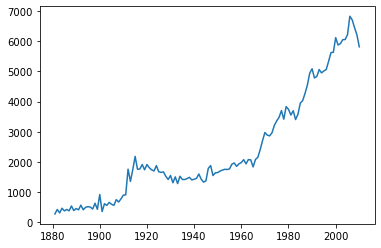

In [57]:
pd.Series(year_new).plot()

# 

## Getting name proportion by year.

In [60]:
def get_prop(group):
    group['prop'] = group.total / group.total.sum()
    return group

In [62]:
proportions = data.groupby(['year', 'gender']).apply(get_prop)
proportions

,name,gender,total,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


Checking... if that is right.

In [75]:
proportions.groupby(['year', 'gender'])['prop'].sum()

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2008  M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
Name: prop, Length: 262, dtype: float64

# 

## Top 1000 names each year / gender 

In [154]:
top1000 = proportions.groupby(['year', 'gender']).apply(
    lambda group: group.sort_values(by= 'total', ascending= False)[:1000])

In [155]:
top1000.drop(['year', 'gender'], axis= 1, inplace= True)
top1000 = top1000.droplevel(level= 2)
top1000

name  total      prop
year gender                            
1880 F            Mary   7065  0.077643
     F            Anna   2604  0.028618
     F            Emma   2003  0.022013
     F       Elizabeth   1939  0.021309
     F          Minnie   1746  0.019188
...                ...    ...       ...
2010 M          Camilo    194  0.000102
     M          Destin    194  0.000102
     M          Jaquan    194  0.000102
     M          Jaydan    194  0.000102
     M          Maxton    193  0.000102

[261877 rows x 3 columns]

This ↑ will be useful in the further investigation.

## Now, analyzing trends of some handful of names yearwise. 

In [156]:
boys = top1000[top1000.index.get_level_values(1) == 'M']
girls = top1000[top1000.index.get_level_values(1) == 'F']

In [157]:
trending_boys = boys.groupby('name').total.sum().sort_values(ascending= False)[:5]
trending_girls = girls.groupby('name').total.sum().sort_values(ascending= False)[:5]

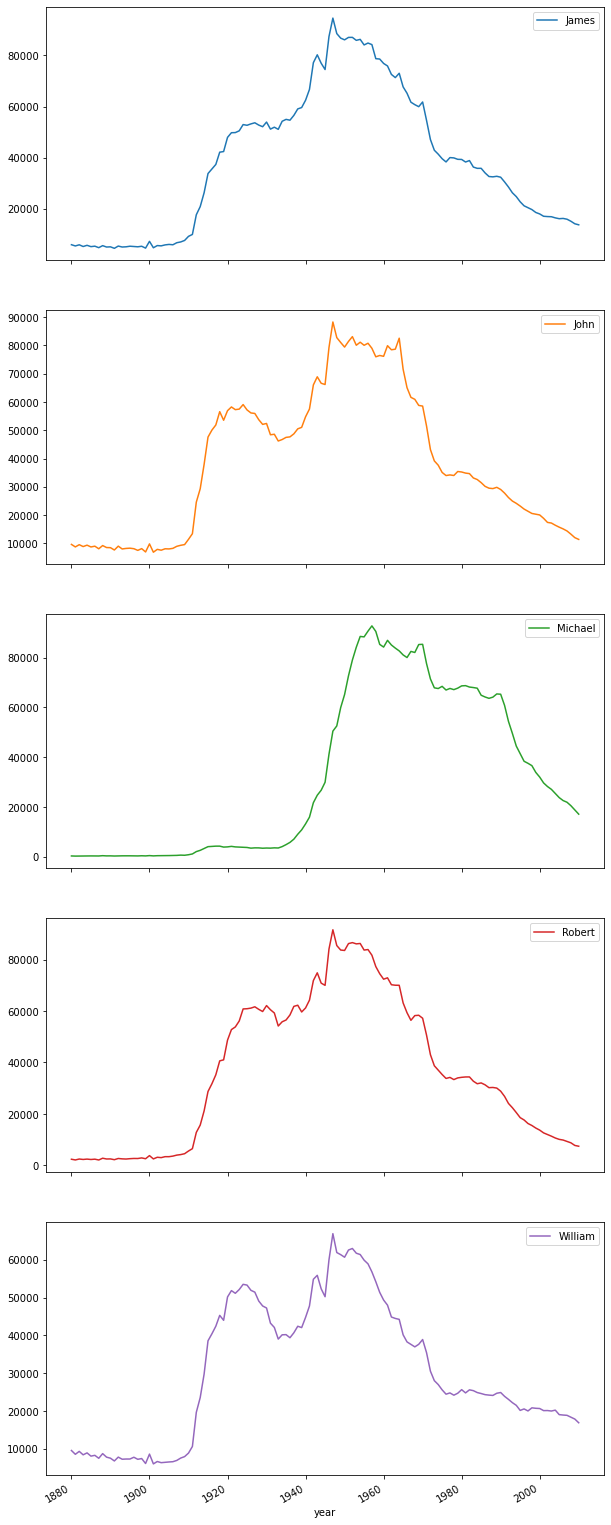

In [158]:
boys[boys.name.isin(trending_boys.index)].droplevel(1) \
                        .reset_index().pivot_table('total', 
                                                    columns= 'name',
                                                    index= 'year').plot(subplots= True,
                                                                        figsize= (10, 30),
                                                                        grid= False);

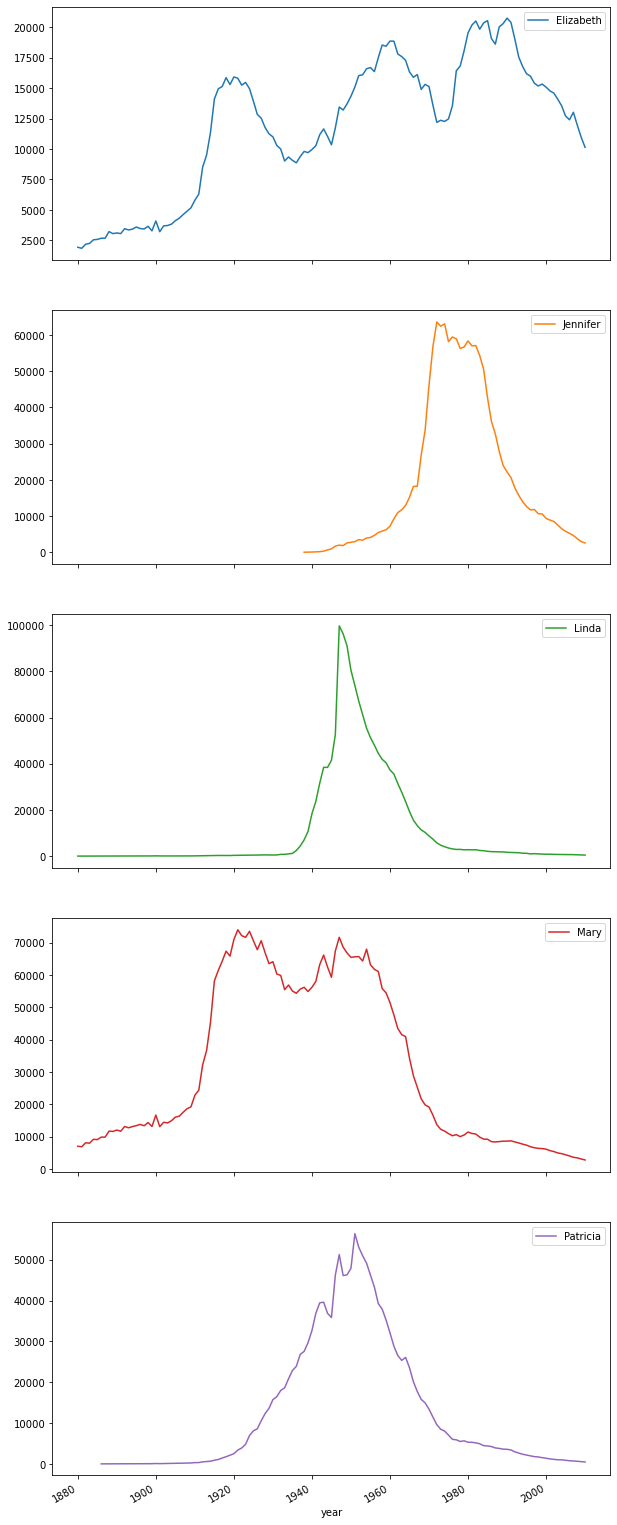

In [159]:
girls[girls.name.isin(trending_girls.index)].droplevel(1) \
                        .reset_index().pivot_table('total', 
                                                    columns= 'name',
                                                    index= 'year').plot(subplots= True,
                                                                        figsize= (10, 30),
                                                                        grid= False);

# 

There are spikes but then the trend starts to decrease, as the author says, parents start looking for less common names for their children.

To test the hypothesis, he goes like...

In [162]:
top1000 = top1000.reset_index()

In [163]:
top1000

,year,gender,name,total,prop
0,1880,F,Mary,7065,0.077643
1,1880,F,Anna,2604,0.028618
2,1880,F,Emma,2003,0.022013
3,1880,F,Elizabeth,1939,0.021309
4,1880,F,Minnie,1746,0.019188
...,...,...,...,...,...
261872,2010,M,Camilo,194,0.000102
261873,2010,M,Destin,194,0.000102
261874,2010,M,Jaquan,194,0.000102
261875,2010,M,Jaydan,194,0.000102


In [166]:
table = top1000.pivot_table('prop', index= 'year', columns= 'gender', aggfunc= sum)
table

gender,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


Wondering why they didn't add up to 1.0 ? that's because, we are only looking for 1000 names.

<AxesSubplot:xlabel='year'>

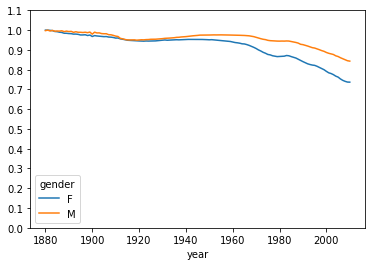

In [174]:
table.plot(yticks= np.arange(0, 1.2, .1))

Top 1000 names are losing their proportion by year... this confirms that.

# 

## How many names are required to make up 50% of the population?
Here we will use the prop column. That by each year and each gender. For both gender mixed, we will do some further calculations.

#### Simply, for boys - in 1880 

In [178]:
#We will use whole data
proportions

,name,gender,total,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [213]:
_1880 = proportions[(proportions.year == 1880) & (proportions.gender == 'M')]
_1880

,name,gender,total,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
1995,Woodie,M,5,1880,0.000045
1996,Worthy,M,5,1880,0.000045
1997,Wright,M,5,1880,0.000045
1998,York,M,5,1880,0.000045


Since we are trying to get the names that make up to 50%, we will do some sorting first.

In [214]:
# See, whole is 100%
_1880.prop.sum()

0.9999999999999999

In [215]:
boys_in_1880 = _1880.prop.sort_values(ascending= False).cumsum().reset_index(drop=True)
boys_in_1880

0       0.087381
1       0.173658
2       0.227299
3       0.275701
4       0.322093
          ...   
1053    0.999819
1054    0.999864
1055    0.999909
1056    0.999955
1057    1.000000
Name: prop, Length: 1058, dtype: float64

So, to get `where it hit 0.5` or 50$, we can use some kind of search function or some indexing... but that sounds shit. 

Let's do both ways.

#### Way 1

In [216]:
boys_in_1880[boys_in_1880 < 0.6]

0     0.087381
1     0.173658
2     0.227299
3     0.275701
4     0.322093
5     0.351434
6     0.375255
7     0.398188
8     0.420307
9     0.442173
10    0.463568
11    0.483044
12    0.498928
13    0.513399
14    0.527599
15    0.541111
16    0.550379
17    0.558244
18    0.565737
19    0.572353
20    0.578960
21    0.585567
22    0.592155
23    0.597984
Name: prop, dtype: float64

It is 13. Means, if the 13 names combined, we get the 50% of population in boys.

#### Way 2 

In [218]:
boys_in_1880.searchsorted(0.5)

13

Matches!

# 

So instead of doing by hand, let's use `.groupby()` and do for both genders.

In [233]:
def get_50_mark(group):
    sort = group.sort_values(ascending= False).cumsum()
    return sort.searchsorted(0.5) + 1

In [234]:
done_50 = proportions.groupby(['year', 'gender'])['prop'].apply(get_50_mark).unstack()
done_50

gender,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:xlabel='year'>

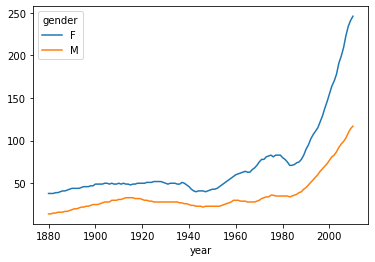

In [235]:
done_50.plot()

From this we can see that, girls names are more diverse than boys, because to reach 50%, we need more names than boys'. (There can be more spellings combinations too)

## Not trying to get the total proportions. 

In [240]:
data

,name,gender,total,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [243]:
proportions_total = data.copy()
proportions_total['prop'] = proportions_total.groupby('year')['total'].apply(
                                lambda group: group / group.sum())

In [247]:
proportions_total.groupby('year').prop.sum()

year
1880    1.0
1881    1.0
1882    1.0
1883    1.0
1884    1.0
       ... 
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
Name: prop, Length: 131, dtype: float64

<AxesSubplot:xlabel='year'>

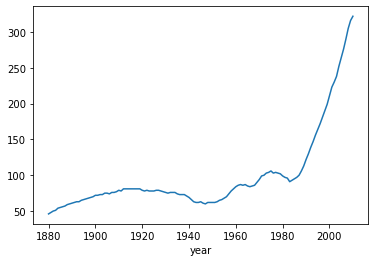

In [251]:
proportions_total.groupby('year').prop.apply(get_50_mark).plot()

So this is how it looks like.

# 

## Last Letter 

In [6]:
data['last_letter'] = data.name.str[-1]
data

,name,gender,total,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,e
1690780,Zyonne,M,5,2010,e
1690781,Zyquarius,M,5,2010,s
1690782,Zyran,M,5,2010,n


In [14]:
last_letter_table = data.pivot_table('total', index='last_letter', columns= ['gender','year'], aggfunc= sum)
last_letter_table

gender             F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                                  ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

Taking some years - to compare

In [15]:
years = [1880, 1950, 2010]
# years = [1910, 1960, 2010]

In [16]:
idx = pd.IndexSlice

In [17]:
last_letter_table = last_letter_table.loc[:, idx[:, years]]

In [18]:
last_letter_table

gender             F                            M                    
year            1880      1950      2010     1880      1950      2010
last_letter                                                          
a            31446.0  576481.0  670605.0    776.0    4037.0   28438.0
b                NaN      17.0     450.0    509.0    1632.0   38859.0
c                NaN      16.0     946.0    349.0    6500.0   23125.0
d              609.0    4413.0    2607.0   9177.0  263643.0   44398.0
e            33378.0  376863.0  313833.0  13493.0  168659.0  129012.0
f                NaN       NaN      97.0    108.0     851.0    2255.0
g                7.0     109.0     657.0    147.0    7437.0    2666.0
h             4863.0   77899.0  133424.0   4049.0   67926.0   98090.0
i               61.0   18111.0   55820.0    200.0     622.0   42956.0
j                NaN       NaN     159.0      NaN       5.0    1459.0
k               13.0     202.0     626.0   4720.0   55780.0   35198.0
l             2541.0   65088.0   46360.0   5090.0  172053.0  133583.0
m               58.0    1608.0    4552.0  11260.0   68846.0   46808.0
n             3008.0  251970.0  246631.0  16929.0  251831.0  688677.0
o               30.0    7248.0    2187.0    933.0   19269.0   81025.0
p                NaN      36.0      35.0    282.0   11391.0    2409.0
q                NaN       NaN      53.0      NaN       NaN     342.0
r              481.0    8398.0   31707.0   7454.0   61049.0  166064.0
s             1391.0   39035.0   23451.0  18453.0  241618.0  123670.0
t             2152.0   38183.0   13773.0   6949.0  122970.0   43398.0
u              380.0     918.0     734.0     25.0      77.0    2318.0
v                NaN       NaN     205.0     33.0      29.0    2723.0
w                NaN      42.0    2080.0    853.0    7028.0   30656.0
x                NaN      54.0    1279.0    304.0    3192.0   16352.0
y            10469.0  245709.0  205501.0   8371.0  253223.0  110425.0
z              106.0     601.0    1238.0     29.0     268.0    3476.0

Making proportioned table. (This is really amazing)

In [19]:
last_letter_table = last_letter_table / last_letter_table.sum()
last_letter_table

gender              F                             M                    
year             1880      1950      2010      1880      1950      2010
last_letter                                                            
a            0.345587  0.336533  0.381240  0.007023  0.002255  0.014980
b                 NaN  0.000010  0.000256  0.004607  0.000912  0.020470
c                 NaN  0.000009  0.000538  0.003159  0.003631  0.012181
d            0.006693  0.002576  0.001482  0.083055  0.147292  0.023387
e            0.366819  0.220002  0.178415  0.122116  0.094226  0.067959
f                 NaN       NaN  0.000055  0.000977  0.000475  0.001188
g            0.000077  0.000064  0.000374  0.001330  0.004155  0.001404
h            0.053444  0.045475  0.075852  0.036645  0.037949  0.051670
i            0.000670  0.010573  0.031734  0.001810  0.000347  0.022628
j                 NaN       NaN  0.000090       NaN  0.000003  0.000769
k            0.000143  0.000118  0.000356  0.042718  0.031163  0.018541
l            0.027925  0.037996  0.026356  0.046066  0.096122  0.070367
m            0.000637  0.000939  0.002588  0.101907  0.038463  0.024657
n            0.033057  0.147093  0.140210  0.153213  0.140693  0.362771
o            0.000330  0.004231  0.001243  0.008444  0.010765  0.042681
p                 NaN  0.000021  0.000020  0.002552  0.006364  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.005286  0.004903  0.018025  0.067461  0.034107  0.087477
s            0.015287  0.022787  0.013332  0.167006  0.134987  0.065145
t            0.023650  0.022290  0.007830  0.062891  0.068701  0.022861
u            0.004176  0.000536  0.000417  0.000226  0.000043  0.001221
v                 NaN       NaN  0.000117  0.000299  0.000016  0.001434
w                 NaN  0.000025  0.001182  0.007720  0.003926  0.016148
x                 NaN  0.000032  0.000727  0.002751  0.001783  0.008614
y            0.115053  0.143438  0.116828  0.075760  0.141470  0.058168
z            0.001165  0.000351  0.000704  0.000262  0.000150  0.001831

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'FEMALE'}, xlabel='last_letter'>

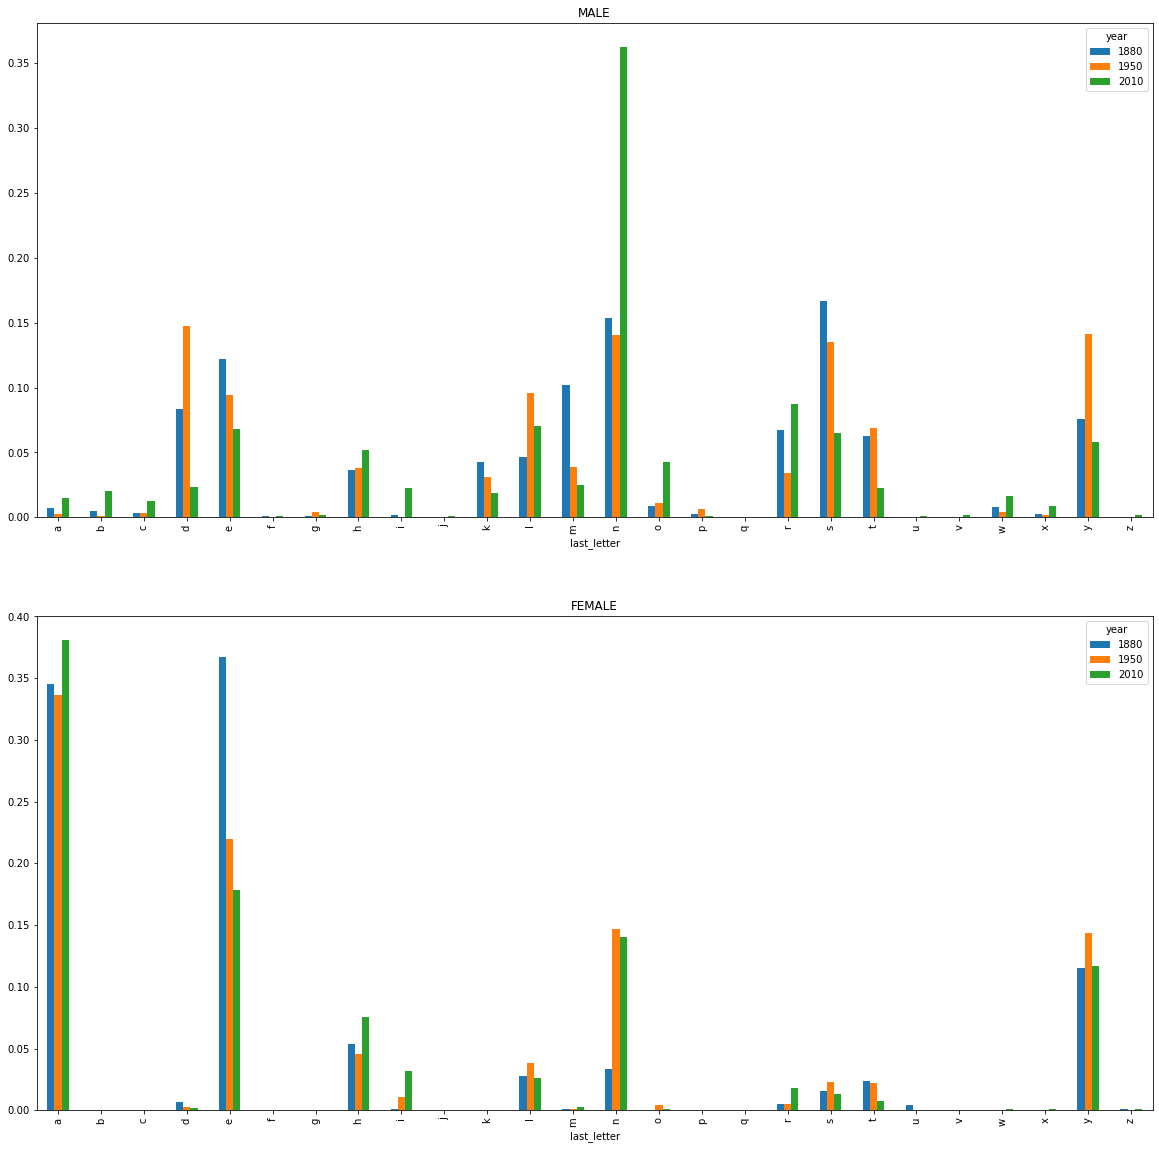

In [21]:
fig, axes = plt.subplots(2, 1, figsize= (20, 20))

last_letter_table['M'].plot(kind= 'bar', ax= axes[0], title= 'MALE')
last_letter_table['F'].plot(kind= 'bar', ax= axes[1], title= 'FEMALE')

# 

## Names (from whole data) used for both genders

In [22]:
# Unique names
data.name.nunique()

88496

In [24]:
# Used in both
females = data[data.gender == 'F']['name'].unique()
males = data[data.gender == 'M']['name'].unique()

commons = np.intersect1d(females, males)
commons

array(['Aaden', 'Aadi', 'Aadyn', ..., 'Zyion', 'Zyon', 'Zyree'],
      dtype=object)

In [26]:
commons.size

9652

In [27]:
# That means
9652 / 88496

0.1090670764780329

10% of total names share both genders.

In [28]:
# Testing.
data[data.name == 'Aaden'].gender.unique()

array(['M', 'F'], dtype=object)

In [29]:
# Testing.
data[data.name == 'Emma'].gender.unique()

array(['F', 'M'], dtype=object)

In [30]:
# Testing. (Which is not in list of commons)
data[data.name == 'Aayush'].gender.unique()

array(['M'], dtype=object)

# 

# That's it! 
From this EDA, I learnt many things... their summary

* **Ask questions like**
    - Number of genders by year
    - Do proportions and work with it
    - Work with top 1000 and so
    - The trend of top names in times
    - Something strange? Don't get to conclusion, make your data to answer
    - Use proportion to analyze trend
    - How many makes 50%
    - Last letter and trend
    - Misspellings
    
* **Workarounds**
    - Use `searchsorted`
    - Use `np.setdifference()`
    - Use `np.intersection1d()`
    - Use `group / group.sum()`
    - Try to use **apply** when needed. It helps to glue the dataframe
    - Title, xticks, yticks can be given directly in DF.plot()
    - TAKE PROPORTIONS man!